In [67]:
import os
os.chdir('/Volumes/FAIR/DC-Image-Analysis/DC-project-master/cleancode')

import core
import numpy as np
import pylab as plt
import nibabel as nib
from scipy import ndimage
from skimage import filters
from scipy.ndimage.morphology import binary_erosion as be
from scipy.ndimage.morphology import binary_fill_holes as bfh
from scipy.ndimage.morphology import binary_dilation as bd
from scipy.ndimage.morphology import binary_opening as bo
from scipy.ndimage.morphology import binary_closing as bc
from scipy.ndimage.morphology import grey_dilation as gd
import time
from skimage.segmentation import find_boundaries as boundaries
import skimage
import SimpleITK as sitk
import nipype.interfaces.fsl as fsl

path = '/Volumes/FAIR/20150326_164734/1.dcm'

if path.endswith('.dcm'):
    array, ConstPixelSpacing, origin, path, affine = core.dicom2np(path)
    bone = core.thresholdnp(array, 150, 1500)
    softtissue  = core.thresholdnp(array, 0, 80)


In [62]:
ConstPixelSpacing = np.abs(ConstPixelSpacing)
ConstPixelSpacing

array([ 1.9531    ,  1.9531    ,  2.74766355])

In [61]:
rray = np.flip(array,2)
bone = core.thresholdnp(rray, 150, 1500)

AttributeError: 'module' object has no attribute 'flip'

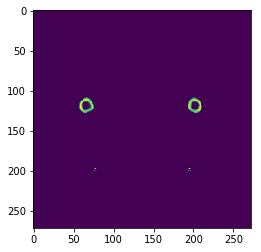

In [60]:
plt.imshow(bone[:,:,100])
plt.show()

In [ ]:
coordinate/Con

In [41]:
ConstPixelSpacing

(1.9531, 1.9531, -2.7476635514018692)

In [63]:
ReshapedArray = core.reshape(array,ConstPixelSpacing)
ReshapedArray.shape

(531, 531, 296)

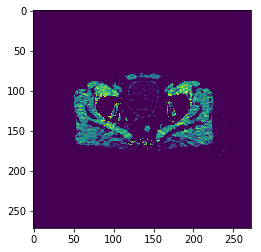

In [64]:
plt.imshow(softtissue[:,:,55])
plt.show()

In [68]:
def saveMask(array, path, name):
    mask = array.astype(np.float64)
    mask = np.swapaxes(mask, 0, 1)
    img = nib.Nifti1Image(mask, affine)
    savePath = os.path.join(os.path.split(path)[0], '{}.nii.gz'.format(name))
    nib.save(img, savePath)

In [76]:
softtissue = softtissue > 0.0

In [77]:
saveMask(softtissue, path, 'softtissue')

In [27]:
ReshapedArray = core.reshape(array,ConstPixelSpacing)
ReshapedArray.shape

ValueError: negative dimensions are not allowed

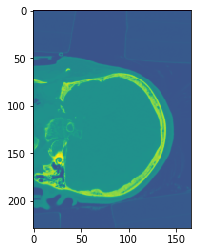

In [22]:
plt.imshow(ReshapedArray[:,100,:])
plt.show()

In [11]:
array=np.swapaxes(array, 0, 1)
softtissue  = core.thresholdnp(array, 0, 80)

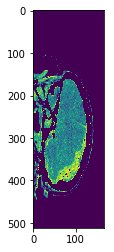

In [12]:
plt.imshow(softtissue[:,200,:])
plt.show()

In [15]:
A = np.multiply(array,array>1000.0)

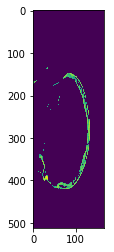

In [16]:
plt.imshow(A[:,200,:])
plt.show()

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, 